<a href="https://colab.research.google.com/github/Bevier19jac/3DDigitalDataset/blob/main/Determine_K.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
# Load the Iris dataset
iris = load_iris()
X = iris.data

In [ ]:
# Standardize the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

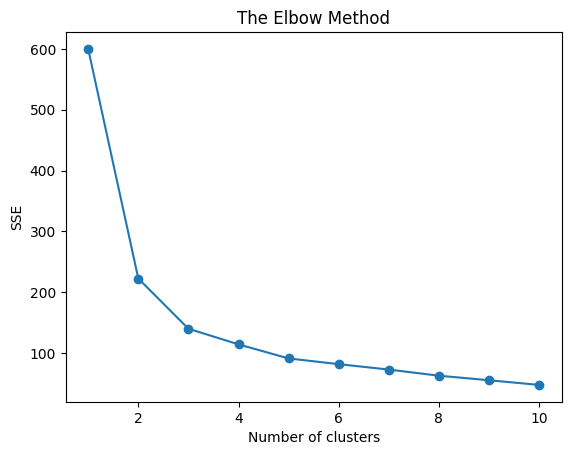

In [6]:
# Elbow method to find optimal # of clusters
sse = []  # store sum of squared errors (SSE)
k_values = range(1, 11)  # of clusters to try, 1 to 10

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)  # Fit model
    sse.append(kmeans.inertia_)

# Plot elbow curve
plt.plot(k_values, sse, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

In [7]:
# Import libraries
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import time


In [8]:
# Load the MNIST dataset
mnist = fetch_openml('mnist_784')
X = mnist.data  # Features (images)
y = mnist.target  # Labels (digits)


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [9]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
# Standardize the training and testing datasets
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [11]:
# Apply PCA to the training and testing datasets
pca = PCA(0.95)  # Retain 95% of variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)


In [12]:
# Logistic regression without PCA
start_time = time.time()
log_reg = LogisticRegression(solver='lbfgs', max_iter=1000)
log_reg.fit(X_train_scaled, y_train)  # Train model
y_pred = log_reg.predict(X_test_scaled)  # Predict
accuracy_no_pca = accuracy_score(y_test, y_pred)  # Calc accuracy
time_no_pca = time.time() - start_time  # Calculate  taken

print(f"Accuracy without PCA: {accuracy_no_pca}")
print(f"Time taken without PCA: {time_no_pca} seconds")


Accuracy without PCA: 0.9164285714285715
Time taken without PCA: 309.53381609916687 seconds


In [13]:
# Logistic regression with PCA
start_time = time.time()
log_reg_pca = LogisticRegression(solver='lbfgs', max_iter=1000)
log_reg_pca.fit(X_train_pca, y_train)  # Train model on PCA data
y_pred_pca = log_reg_pca.predict(X_test_pca)  # Predict
accuracy_with_pca = accuracy_score(y_test, y_pred_pca)  # Calc accuracy
time_with_pca = time.time() - start_time  # Calculate time

print(f"Accuracy with PCA: {accuracy_with_pca}")
print(f"Time taken with PCA: {time_with_pca} seconds")


Accuracy with PCA: 0.9216428571428571
Time taken with PCA: 165.47357726097107 seconds


In [14]:
print(f"Accuracy without PCA: {accuracy_no_pca}, Time: {time_no_pca} seconds")
print(f"Accuracy with PCA: {accuracy_with_pca}, Time: {time_with_pca} seconds")


Accuracy without PCA: 0.9164285714285715, Time: 309.53381609916687 seconds
Accuracy with PCA: 0.9216428571428571, Time: 165.47357726097107 seconds
